# IMEC2201 Herramientas Computacionales 
## Semana 5: Sistemas de Ecuaciones
### Clase 10: Estática

Universidad de los Andes — Mayo 4, 2022.

---

## TABLA DE CONTENIDO

### Sección 1: Estática [→](#section1)
- 1.1. Momento Par o Torque
- 1.2. Equilibrio
- 1.3. Ejemplos Diagrama Cuerpo Libre
- 1.4. Condiciones de Equilibrio
- 1.5. Ejemplo 1
    - 1.5.1. Método de Matrices
    - 1.5.2. Librería NLsolve.jl
    - 1.5.3. Librería HomotopyContinuation.jl
- 1.6. Ejemplo 2
    - 1.6.1. Método de Matrices
    - 1.6.2. Librería NLsolve.jl
    - 1.6.3. Librería HomotopyContinuation.jl
- 1.7. Estructuras
- 1.8. Ejemplo 3
    - 1.8.1. Librería HomotopyContinuation.jl
___

**¡Importante!** Note que la carpeta **week5** contiene dos archivos: `Project.toml` y `Manifest.toml`. Estos configuran el <font color="#FF5733">*ambiente de trabajo*</font> y facilitan el manejo de <font color="#FF5733">librerías</font>.

Para inicializar el ambiente desde Julia REPL, dentro de la carpeta **week5**, ejecute lo siguiente:

```shell
$ (v1.7) pkg > activate .
$ (week5) pkg> instantiate
```

**Nota:** Para acceder al Pkg REPL, escriba el corchete derecho `]` en el Julia REPL. Note que el REPL cambie de color de verde (Julia REPL) a azul (Pkg REPL). Una vez ejecutado el código `activate .`, el prefijo entre paréntesis indica el ambiente activo: cambia de `v1.7` a `week5`.

O, desde Jupyter Notebook, ejecute:

```julia
$ using Pkg
$ Pkg.activate()
$ Pkg.instantiate()
```

**Nota:** La activación del ambiente <font color="#FF5733">*precompila*</font> las librerías por lo que puede tardar un momento su ejecución completa.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería [`Pkg.jl`](https://pkgdocs.julialang.org/v1/environments/) y en el documento dando clic [aquí](https://towardsdatascience.com/how-to-setup-project-environments-in-julia-ec8ae73afe9c).
</div>

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `~/Documents/GitHub/ua-imec2001-hc-202210/content/week5`


In [2]:
Pkg.status()

      Status `~/Documents/GitHub/ua-imec2001-hc-202210/content/week5/Project.toml`
  [f213a82b] HomotopyContinuation v2.6.4
  [2774e3e8] NLsolve v4.5.1
  [91a5bcdd] Plots v1.28.0


<a id="section1"></a>
# Sección 1: Estática

## 1.1. Momento Par o Torque

Uuna fuerza puede hacer girar un cuerpo alrededor de un eje, siempre y cuando el eje puede ser cualquier línea que no corte ni sea paralela a la línea de acción de la fuerza.

Esta tendencia rotacional se conoce como el **momento par** $M$ o **torque** de la fuerza.

De forma explícita, se tiene que:

$$
M = F \: d \: sin\theta
$$

<img src='./img/torque.png' width='700' height='700' />

## 1.2. Equilibrio

La estática se ocupa principalmente de la descripción de las condiciones de fuerza y momento necesarias y *suficientes* para mantener el **equilibrio** de las estructuras de ingeniería.

Cuando un cuerpo está en equilibrio, la resultante de todas las fuerzas y momentos que actúan sobre él es cero. Por lo tanto, la fuerza resultante y el momento par resultante son ambos cero y tenemos el sistema de ecuaciones de equilibrio.

$$
\sum F = 0
$$

$$
\sum M = 0
$$

El primer paso para estudiar una estructura es representar completamente todas las fuerzas y momentos que actúan sobre el cuerpo. Se debe tener cuidado con la omisión de una fuerza que actúa sobre el cuerpo o la inclusión de una fuerza que no actúa sobre este, pues esto deriva en resultados erróneos. La representación de fuerzas y momentos se conoce como **diagrama de cuerpo libre**.

En general, para construir los diagramas de cuerpo libre, tenemos los siguientes análisis en dos dimensiones:

<img src='./img/dcl.png' width='700' height='700' />

## 1.3. Ejemplos Diagrama Cuerpo Libre

<img src='./img/dcl_examples.png' width='1000' height='1000' />

## 1.4. Condiciones de Equilibrio

Recordemos que equilibrio es la condición en donde la resultante de todas las fuerzas y momentos que actúan sobre un cuerpo es cero. Dicho de otra manera, un cuerpo está en equilibrio si todas las fuerzas y momentos que se le aplican están en balance.

$$
\sum F_x = 0
$$

$$
\sum F_y = 0
$$

$$
\sum M_o = 0
$$

Como lo comentamos en la clase anterior, **el número de ecuaciones debe ser igual al número de incógnitas para que el sistema sea compatible y determinado**.

## 1.5. Ejemplo 1

Debemos determinar las magnitudes de las fuerzas $C$ y $T$ que, junto con las otras tres fuerzas que se muestran, actúan sobre el nudo del puente y la armadura.

<img src='./img/example1.png' width='300' height='300'/>

Analíticamente, empleando el método de sustitución, tenemos que:

$$
\begin{cases}
  \sum F_x = 0 \: \rightarrow \: 8 + T \cos(40) + C \sin(20) - 16 = 0 & (1)\\ 
  \\
  \sum F_y = 0 \: \rightarrow \: T \sin(40) - C \cos(20) - 3 = 0 & (2)\\
\end{cases} 
$$

**Paso 1.** Despejamos $T$ de la Ecuación 1:

$$
T = \frac{16 - 8 - C \sin(20)}{\cos(40)} \hspace{1cm} (3)
$$

**Paso 2.** Sustituimos cada ocurrencia de la incógnita $T$ en la Ecuación 2, para así obtener una ecuación donde la única incógnita sea $C$:

$$
\frac{16 - 8 - C \sin(20)}{\cos(40)} \cdot \sin(40) - C \cos(20) - 3 = 0 \hspace{1cm} (4)
$$

**Paso 3.** Resolvemos la Ecuación 4 para determinar $C$:

$$
\boxed{C = 3.03}
$$

**Paso 4.** Ahora sustituimos $C$ en la Ecuación 1 para determinar $T$:

$$
8 + T \cos(40) + 3.03 \sin(20) - 16 = 0
$$

$$
\boxed{T = 9.09}
$$

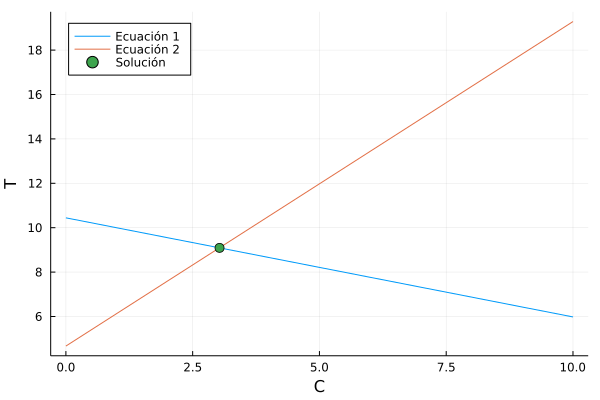

In [3]:
using Plots

C = collect(0:1:10)

eq1(C) = (16 - 8 - C * sin(deg2rad(20))) / cos(deg2rad(40)) # Ecuación 1
eq2(C) = (3 + C * cos(deg2rad(20))) / sin(deg2rad(40)) # Ecuación 2

plot(C, eq1.(C), label="Ecuación 1")
plot!(C, eq2.(C), label="Ecuación 2")
plot!([3.03], [9.09], seriestype=:scatter, m=:circle, ms=5, label="Solución", legend=:topleft)

xlabel!("C")
ylabel!("T")

### 1.5.1. Método de Matrices

Como vimos en la clase anterior (`C9_sistemaecuaciones.ipynb`), tenemos $m$ ecuaciones lineales con $n$ incógnitas, donde las incógnitas son $x_1, x_2, ..., x_n$.

$$
\begin{cases}
  a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1 & (1) \\ 
  \\
  a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2 & (2) \\
  \\
  \hspace{2.5cm} \vdots \\
  \\
   a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m & (m) \\
\end{cases} 
$$

Ahora, si separamos los coeficientes $a_{nm}$, es posible reescribir el sistema de ecuaciones en forma matricial, es decir:

$$
{\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn} \\
\end{bmatrix}}
{\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}} =
{\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n \\
\end{bmatrix}}
$$

Representando cada matrix con una letra, se tiene:

$$
Ax = b
$$

Donde:
- $A$ es una matriz de $m$ filas por $n$ columnas y se conoce como **matriz de coeficientes**.
- $x$ es un vector columna de longitud $n$ (es decir, 1 columna y $n$ filas) y se conoce como **vector de incógnitas**.
- $b$ es un vector columna de longitud $m$ (es decir, 1 columna y $m$ filas) y se conoce como **vector de términos independientes**.

La solución es entonces:

$$
\boxed{x = A^{-1} b}
$$

El término $A^{-1}$ es la **inversa de la matrix $A$**. En Julia, la inversa de una matriz se obtiene mediante `inv(A)` o `A\`.

In [4]:
#=
Ejemplo 1

8 + T·cos(40) + C·sin(20) - 16 = 0
T·sin(40) - C·cos(20) - 3 = 0

Solución -> C = 3.03 y T = 9.09
=#

# Matriz de coeficientes (2 filas y 2 columnas)
A = [cos(deg2rad(40))  sin(deg2rad(20));
     sin(deg2rad(40)) -cos(deg2rad(20))]

# Vector de términos independientes (2 filas y 1 columna)
b = [8, 3]

# Vector de incógnitas (2 filas y 1 columna)
x = inv(A) * b 
x # [T, C]

2-element Vector{Float64}:
 9.091910702798607
 3.0266998859229846

### 1.5.2. Librería `NLsolve.jl`

Veamos la sintaxis de `NLsolve.jl` con el Ejemplo 1 de la clase anterior (`C9_sistemaecuaciones.ipynb`):

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases}
$$

```julia
# Paso 1. Importar librería
using NLsolve

# Paso 2. Definir las funciones
# **Importante:** Las ecuaciones deben estar igualadas a cero
function f!(F, x) # Importante poner un "!" al final del nombre de la función 
    F[1] = 3*x[1] + x[2] - 22
    F[2] = 4*x[1] - 3*x[2] + 1
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [a, a]) # Sintaxis: 1. Función, 2. [Puntos Iniciales Según Número Incógnitas)]

# Paso 4. Llamar la solución directamente
solucion.zero
```

Fíjense que el parámetro de punto inicial está entre corchetes `[]`, es decir, es un Array. ¿Por qué? Note que en la función `f!`, la variable la llamamos como entradas del Array (es decir, `x[1]` y `x[2]`).

**Nota:** Más información de la librería `NLsolve.jl` [aquí](https://github.com/JuliaNLSolvers/NLsolve.jl) y [aquí](https://morioh.com/p/367a415c21db).

In [5]:
#=
Ejemplo 1

8 + T·cos(40) + C·sin(20) - 16 = 0
T·sin(40) - C·cos(20) - 3 = 0

Solución -> C = 3.03 y T = 9.09
=#

# Paso 1. Importar librería
using NLsolve

# Paso 2. Definir las funciones: T será x[1] y C será x[2]
function f!(F, x) 
    F[1] = 8 + x[1]*cos(deg2rad(40)) + x[2]*sin(deg2rad(20)) - 16
    F[2] = x[1]*sin(deg2rad(40)) - x[2]*cos(deg2rad(20)) - 3
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [0.0, 0.0])

# Paso 4. Llamar la solución directamente
solucion.zero

2-element Vector{Float64}:
 9.09191070262354
 3.0266998857841965

### 1.5.3. Librería `HomotopyContinuation.jl`

**Nota:** Más información de la librería [aquí](https://www.juliahomotopycontinuation.org/guides/solve-first-system/), [aquí](https://www.juliahomotopycontinuation.org/guides/introduction/) y [aquí](https://www.juliahomotopycontinuation.org/HomotopyContinuation.jl/stable/solve/).

In [6]:
#=
Ejemplo 1

8 + T·cos(40) + C·sin(20) - 16 = 0
T·sin(40) - C·cos(20) - 3 = 0

Solución -> C = 3.03 y T = 9.09
=#

# Paso 1. Importar librería
using HomotopyContinuation

# Paso 2. Declarar las variables incógnitas
@var T C

# Paso 3. Definir las funciones
f₁ = 8 + T*cos(deg2rad(40)) + C*sin(deg2rad(20)) - 16
f₂ = T*sin(deg2rad(40)) - C*cos(deg2rad(20)) - 3

# Paso 4. Definir el sistema de ecuaciones con 'System([])'
F = System([f₁, f₂])

# Paso 5. Emplear el solucionador 'solve()'
result = solve(F)

# Paso 6. Extraer soluciones **reales**
real_solutions(result)

1-element Vector{Vector{Float64}}:
 [3.0266998859229854, 9.091910702798607]

## 1.6. Ejemplo 2

Debemos determinar la magnitud de la tensión $T$ en el cable de soporte y la magnitud de la fuerza sobre el pasador en $A$ para la grúa giratoria que se muestra. La viga $AB$ es una viga tipo I estándar de 0.5 m con peso de 4.66 kN.

<img src='./img/example2.png' width='550' height='550'/>

Del diagrama de cuerpo libre vemos **tres incógnidas**: $A_x$, $A_y$ y $T$. Por tanto, debemos definir **tres ecuaciones**.

Analíticamente, empleando el método de sustitución, tenemos que:

$$
\begin{cases}
  \sum M_A = 0 \: \rightarrow \: 0.25 \cdot T \cos(25) + (5-0.12) \cdot T \sin(25) - 10 \cdot (5 - 1.5 - 0.12) - 4.66 \cdot (2.5 - 0.12) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: A_x - T \cdot \cos(25) = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: A_y + T \cdot \sin(25) - 4.66 - 10 = 0 & (3)\\
\end{cases} 
$$

En este caso particular, notemos que, aunque tenemos tres ecuaciones y tres incógnitas, cada ecuación solo contiene una incógnita, es decir, una incógnita por cada una de las ecuaciones. Luego, es sencillo determinar las incógnitas, obteniendo que:

$$
\boxed{T = 19.61}
$$

$$
\boxed{A_x = 17.77}
$$

$$
\boxed{A_y = 6.37}
$$

### 1.6.1. Método de Matrices

In [7]:
#=
Ejemplo 2

0.25·T·cos(25) + (5-0.12)·T·sin(25) - 10·(5 - 1.5 - 0.12) - 4.66·(2.5 - 0.12) = 0
Ax - T·cos(25) = 0
Ay + T·sin(25) - 4.66 - 10 = 0

Solución -> T = 19.61, Ax = 17.77 y Ay = 6.37
=#

# Matriz de coeficientes (3 filas y 3 columnas) -> [T Ax Ay]
A = [0.25*cos(deg2rad(25))+(5-0.12)*sin(deg2rad(25))  0  0;
     -cos(deg2rad(25))                                1  0;
     sin(deg2rad(25))                                 0  1]

# Vector de términos independientes (2 filas y 1 columna)
b = [10*(5-1.5-0.12)+4.66*(2.5-0.12), 0, 10+4.66]

# Vector de incógnitas (2 filas y 1 columna)
x = inv(A) * b 
x # [T Ax Ay]

3-element Vector{Float64}:
 19.61192699537956
 17.774442154706783
  6.371641503827192

### 1.6.2. Librería `NLsolve.jl`

In [8]:
#=
Ejemplo 2

0.25·T·cos(25) + (5-0.12)·T·sin(25) - 10·(5 - 1.5 - 0.12) - 4.66·(2.5 - 0.12) = 0
Ax - T·cos(25) = 0
Ay + T·sin(25) - 4.66 - 10 = 0

Solución -> T = 19.61, Ax = 17.77 y Ay = 6.37
=#

# Paso 2. Definir las funciones: T será x[1] y C será x[2]
function f!(F, x) 
    F[1] = 0.25*x[1]*cos(deg2rad(25)) + (5-0.12)*x[1]*sin(deg2rad(25)) - 10*(5-1.5-0.12) - 4.66*(2.5-0.12)
    F[2] = x[2] - x[1]*cos(deg2rad(25))
    F[3] = x[3] + x[1]*sin(deg2rad(25)) - 4.66 - 10
end

# Paso 3. Emplear el solucionador 'nlsolve()'
solucion = nlsolve(f!, [0.0, 0.0, 0.0])

# Paso 4. Llamar la solución directamente
solucion.zero

3-element Vector{Float64}:
 19.611926995560886
 17.774442155163854
  6.371641503840804

### 1.6.3. Librería `HomotopyContinuation.jl`

In [9]:
#=
Ejemplo 2

0.25·T·cos(25) + (5-0.12)·T·sin(25) - 10·(5 - 1.5 - 0.12) - 4.66·(2.5 - 0.12) = 0
Ax - T·cos(25) = 0
Ay + T·sin(25) - 4.66 - 10 = 0

Solución -> T = 19.61, Ax = 17.77 y Ay = 6.37
=#

# Paso 2. Declarar las variables incógnitas
@var T Ax Ay

# Paso 3. Definir las funciones
f₁ = 0.25*T*cos(deg2rad(25)) + (5-0.12)*T*sin(deg2rad(25)) - 10*(5-1.5-0.12) - 4.66*(2.5-0.12)
f₂ = Ax - T*cos(deg2rad(25))
f₃ = Ay + T*sin(deg2rad(25)) - 4.66 - 10

# Paso 4. Definir el sistema de ecuaciones con 'System([])'
F = System([f₁, f₂, f₃])

# Paso 5. Emplear el solucionador 'solve()'
result = solve(F)

# Paso 6. Extraer soluciones **reales**
real_solutions(result)

1-element Vector{Vector{Float64}}:
 [17.774442154706787, 6.371641503827192, 19.611926995379562]

## 1.7. Estructuras

Una estructura de ingeniería es cualquier sistema conectado de elementos construidos para soportar o transferir fuerzas y para **soportar con seguridad** las cargas que se le aplican. Algunos ejemplos son cerchas y máquinas.

Para determinar las fuerzas internas de una estructura de ingeniería, debemos analizar por partes la estructura y realizar diagramas de cuerpo libre separados individualmente o por combinaciones de partes.

Las estructuras requieren una aplicación cuidadosa de la tercera ley de Newton, que establece que cada acción va acompañada de una reacción igual y opuesta.

Para esta clase nos centraremos únicamente en **cerchas**.

Un armazón compuesto por miembros unidos en sus extremos para formar una estructura rígida se llama **cercha**. Algunos ejemplos son: puentes, soportes de techos, torres de perforación.

<img src='./img/cercha.png' width='550' height='550'/>

El método de resolución de las ecuaciones de equilibrio en cerchas se conoce como **Método de Juntas** y es el siguiente:
> Satisfacer las condiciones de equilibrio de las fuerzas que actúan sobre el pin de conexión de cada elemento.

<img src='./img/dcl_cercha.png' width='400' height='400'/>

## 1.8. Ejemplo 3

Debemos determinar la fuerza en cada miembro de la cercha en voladizo por el método de juntas.

<img src='./img/example3.png' width='550' height='550'/>

Del diagrama de cuerpo libre vemos **diez incógnidas** y, por tanto, debemos definir **diez ecuaciones**.

Analíticamente, empleando el método de sustitución, tenemos que:

$$
\begin{cases}
  \sum M_E = 0 \: \rightarrow \: 5 T - 20(5) - 30(10) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: T \cdot \cos(30) - E_x = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: T \cdot \sin(30) + E_y - 20 - 30 = 0 & (3)\\
  \\
  \sum A_y = 0 \: \rightarrow \: AB \cdot \sin(60) - 30 = 0 & (4)\\
  \\
  \sum A_x = 0 \: \rightarrow \: AC - AB \cdot \cos(60) = 0 & (5)\\
  \\
  \sum B_y = 0 \: \rightarrow \: BC \cdot \cos(30) - AB \cdot \cos(30) = 0 & (6)\\
  \\
  \sum B_x = 0 \: \rightarrow \: BD - BC \cdot \sin(30) - AB \cdot \sin(30) = 0 & (7)\\
  \\
  \sum C_y = 0 \: \rightarrow \: CD \cdot \sin(60) - BC \cdot \sin(60) - 20 = 0 & (8)\\
  \\
  \sum C_x = 0 \: \rightarrow \: CE - AC - BC \cdot \cos(60) - CD \cdot \cos(60) = 0 & (9)\\
  \\
  \sum E_y = 0 \: \rightarrow \: DE \cdot \sin(60) = 10 & (10)\\
\end{cases} 
$$

Los siguientes resultados son obtenidos al emplear el método de sustitución:

$$
\boxed{T = 80}
$$

$$
\boxed{E_x = 69.3}
$$

$$
\boxed{E_y = 10}
$$

$$
\boxed{AB = 34.6}
$$

$$
\boxed{AC = 17.32}
$$

$$
\boxed{BC = 34.6}
$$

$$
\boxed{BD = 34.6}
$$

$$
\boxed{CD = 57.7}
$$

$$
\boxed{CE = 63.5}
$$

$$
\boxed{DE = 11.55}
$$

$$
\begin{cases}
  \sum M_E = 0 \: \rightarrow \: 5 T - 20(5) - 30(10) = 0 & (1)\\ 
  \\
  \sum F_x = 0 \: \rightarrow \: 80 \cdot \cos(30) - E_x = 0 & (2)\\
  \\
  \sum F_y = 0 \: \rightarrow \: 80 \cdot \sin(30) + E_y - 20 - 30 = 0 & (3)\\
  \\
  \sum A_y = 0 \: \rightarrow \: AB \cdot \sin(60) - 30 = 0 & (4)\\
  \\
  \sum A_x = 0 \: \rightarrow \: AC - AB \cdot \cos(60) = 0 & (5)\\
  \\
  \sum B_y = 0 \: \rightarrow \: BC \cdot \cos(30) - AB \cdot \cos(30) = 0 & (6)\\
  \\
  \sum B_x = 0 \: \rightarrow \: BD - BC \cdot \sin(30) - AB \cdot \sin(30) = 0 & (7)\\
  \\
  \sum C_y = 0 \: \rightarrow \: CD \cdot \sin(60) - BC \cdot \sin(60) - 20 = 0 & (8)\\
  \\
  \sum C_x = 0 \: \rightarrow \: CE - AC - BC \cdot \cos(60) - CD \cdot \cos(60) = 0 & (9)\\
  \\
  \sum E_y = 0 \: \rightarrow \: DE \cdot \sin(60) = 10 & (10)\\
\end{cases} 
$$

### 1.8.1. Librería `HomotopyContinuation.jl`

In [10]:
#=
Ejemplo 3
=#

# Paso 1. Importar librería
using HomotopyContinuation

# Paso 2. Declarar las variables incógnitas
@var T Ex Ey AB AC BC BD CD CE DE

# Paso 3. Definir las funciones
f₁ = 5*T - 20*5 - 30*10
f₂ = T*cos(deg2rad(30)) - Ex
f₃ = T*sin(deg2rad(30)) + Ey - 20 - 30
f₄ = AB*sin(deg2rad(60)) - 30
f₅ = AC - AB*cos(deg2rad(60))
f₆ = BC*cos(deg2rad(30)) - AB*cos(deg2rad(30))
f₇ = BD - BC*sin(deg2rad(30)) - AB*sin(deg2rad(30))
f₈ = CD*sin(deg2rad(60)) - BC*sin(deg2rad(60)) - 20
f₉ = CE - AC - BC*cos(deg2rad(60)) - CD*cos(deg2rad(60))
f₁₀ = DE*sin(deg2rad(60)) - 10

# Paso 4. Definir el sistema de ecuaciones con 'System([])'
F = System([f₁, f₂, f₃, f₄, f₅, f₆, f₇, f₈, f₉, f₁₀])

# Paso 5. Emplear el solucionador 'solve()'
result = solve(F)

# Paso 6. Extraer soluciones **reales**
real_solutions(result)

1-element Vector{Vector{Float64}}:
 [34.64101615137755, 17.320508075688778, 34.64101615137755, 34.64101615137754, 57.73502691896258, 63.50852961085886, 11.547005383792516, 69.2820323027551, 10.000000000000007, 80.0]